In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
# Listas para almacenar los datos de todos los estadios
nombre_estadio = []
capacidad_estadio = []
espectadores_totales = []
promedio_espectadores_xpartido = []
porcentaje_espectadores_promedio = []
cantidad_partidos = []
estadios_llenos = []
temporadas = []
equipos = []

# Configuramos los encabezados
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.77 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1'
}

# Iterar sobre los años y las páginas
for year in range(2018, 2024):
    for page in range(1, 30):
        # URL de la página de transfermarkt
        url = f"https://www.transfermarkt.com.ar/major-league-soccer/besucherzahlen/wettbewerb/MLS1/saison_id/{year}/galerie/1/page/{page}"

        # Realiza la solicitud a la página
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Verifica que la solicitud se realizó con éxito

        # Analiza el contenido HTML de la página
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encuentra todos los <td> con la clase 'rechts'
        enlaces = soup.find_all('td', class_='rechts')
        nombre_estadium_elements = soup.find_all('td', class_='hauptlink')
        prom_lleno = soup.find_all('td', class_='zentriert')
        equipo_elements = soup.find_all('a', title=True)

        # Extrae el texto de cada <td> y lo almacena en una lista
        spect = [enlace.get_text(strip=True) for enlace in enlaces]
        nombre_estadium = [element.get_text(strip=True) for element in nombre_estadium_elements]
        prom_lleno = [dato.get_text(strip=True) for dato in prom_lleno]
        equipos_extracted = [equipo['title'] for equipo in equipo_elements if '/spielplan/verein/' in equipo['href']]

        # Añadir los datos a las listas correspondientes si los datos están completos
        if len(spect) >= 9 and len(prom_lleno) >= 6 and len(nombre_estadium) >= 1 and equipos_extracted:
            nombre_estadio.append(nombre_estadium[0])
            capacidad_estadio.append(spect[5])
            espectadores_totales.append(spect[6])
            promedio_espectadores_xpartido.append(spect[7])
            porcentaje_espectadores_promedio.append(spect[8])
            cantidad_partidos.append(prom_lleno[4])
            estadios_llenos.append(prom_lleno[5])
            # Agregar la temporada correspondiente al año actual
            temporadas.append(f"{year+1}")
            # Agregar el equipo correspondiente
            equipos.append(equipos_extracted[0])

# Crear el DataFrame con los datos recopilados
estadios_data = {
    'Temporada': temporadas,
    'Equipo': equipos,
    'Nombre Estadio': nombre_estadio,
    'Capacidad': capacidad_estadio,
    'Espectadores Totales': espectadores_totales,
    'Promedio de Espectadores': promedio_espectadores_xpartido,
    'Porcentaje de Espectadores': porcentaje_espectadores_promedio,
    'Cantidad de Partidos': cantidad_partidos,
    'Estadios Llenos': estadios_llenos
}

df = pd.DataFrame(estadios_data)

# Mostrar el DataFrame
df


,Temporada,Equipo,Nombre Estadio,Capacidad,Espectadores Totales,Promedio de Espectadores,Porcentaje de Espectadores,Cantidad de Partidos,Estadios Llenos
0,2019,Atlanta United FC,Mercedes-Benz Stadium,73.019,892.663,52.510,"71,9 %",17,-
1,2019,Seattle Sounders FC,Lumen Field,37.722,684.192,40.247,"106,7 %",17,8
2,2019,FC Cincinnati,TQL Stadium,26.000,464.720,27.336,"105,1 %",17,2
3,2019,Portland Timbers,Providence Park,25.218,428.706,25.218,"100,0 %",17,17
4,2019,Toronto FC,BMO Field,30.991,425.816,25.048,"80,8 %",17,-
...,...,...,...,...,...,...,...,...,...
169,2024,Portland Timbers,Providence Park,25.218,141.904,20.272,"80,4 %",7,-
170,2024,Houston Dynamo FC,Shell Energy Stadium,22.039,136.390,17.049,"77,4 %",8,-
171,2024,Colorado Rapids,Dick's Sporting Goods Park,18.086,133.357,14.817,"81,9 %",9,1
172,2024,New York City FC,Yankee Stadium,30.321,89.469,22.367,"73,8 %",4,-


In [ ]:
# Convertir estadios_data en un DataFrame
df_estadios = pd.DataFrame(estadios_data)

# Convertir la lista de estadios en un DataFrame
df_stadiums = pd.DataFrame(stadiums)

df_completo = pd.merge(df_estadios, df_stadiums, left_on='Nombre Estadio', right_on='name', how='left')

# Opcional: eliminar la columna redundante 'name'
df_completo.drop(columns=['name'], inplace=True)

df_completo

In [11]:
df_completo.to_csv('estadios_completo.csv', index=False)


Se realizó un scrapping de la web de 'Transfermarket.com.ar' con el objetivo de obtener los datos correspondientes al crecimiento del fútbol en los Estados Unidos.
 - Se analizarán los últimos 5 años y la etapa del 2024 corresponde al periodo Enero hasta Julio


In [2]:
df.drop_duplicates(inplace=True)


Se elminó los duplicados para evitar cualquier clase de ruido en los datos, ya que cada equipo o estadio debe tener un registro único por temporada

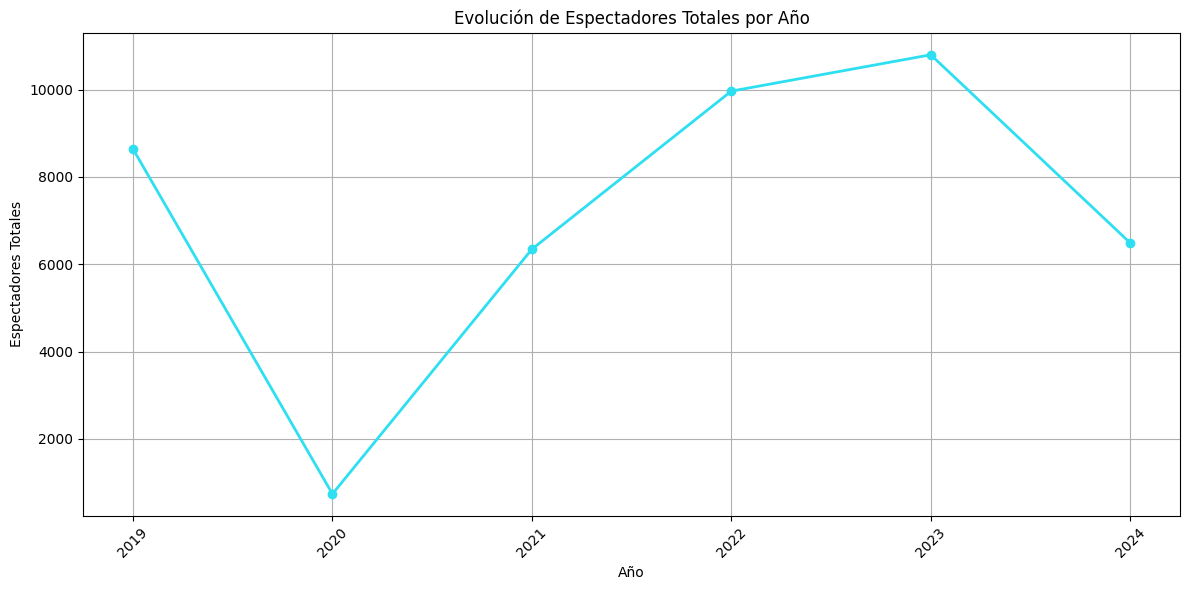

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df
# Asegúrate de que 'Temporada' sea una columna de tipo string que representa el año
df['Temporada'] = df['Temporada'].astype(str)

# Asegúrate de que 'Espectadores Totales' es numérico
df['Espectadores Totales'] = pd.to_numeric(df['Espectadores Totales'], errors='coerce')

# Agrupar por 'Temporada' y sumar 'Espectadores Totales'
df_grouped = df.groupby('Temporada')['Espectadores Totales'].sum().reset_index()

# Ordenar por 'Temporada'
df_grouped = df_grouped.sort_values(by='Temporada')

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Temporada'], df_grouped['Espectadores Totales'], marker='o', color='#2EDFF2', linestyle='-', linewidth=2)
plt.xlabel('Año')
plt.ylabel('Espectadores Totales')
plt.title('Evolución de Espectadores Totales por Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\3857023151.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Temporada', y='Espectadores Totales', palette= custom_colors)
C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\3857023151.py:19: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_grouped, x='Temporada', y='Espectadores Totales', palette= custom_colors)


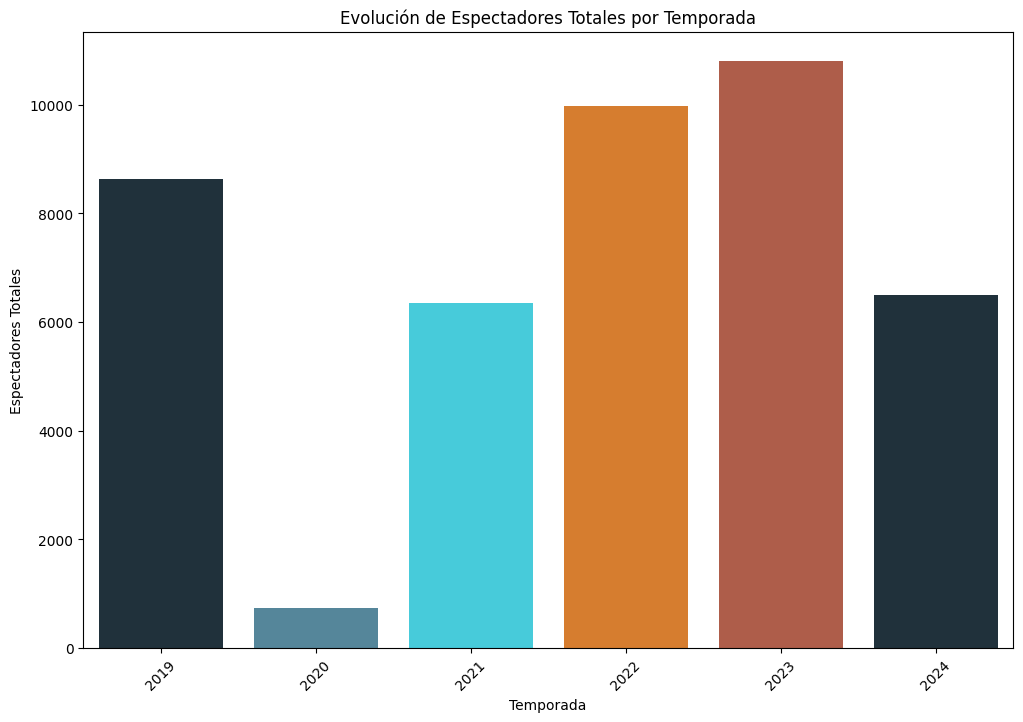

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ['#1B3240', '#498BA6', '#2EDFF2', '#F27B13', '#BF5239']

# Asegúrate de que 'Espectadores Totales' es numérico y 'Temporada' es string
df['Espectadores Totales'] = pd.to_numeric(df['Espectadores Totales'], errors='coerce')
df['Temporada'] = df['Temporada'].astype(str)

# Agrupar los datos por 'Temporada' y sumar 'Espectadores Totales'
df_grouped = df.groupby('Temporada')['Espectadores Totales'].sum().reset_index()

# Ordenar por temporada
df_grouped = df_grouped.sort_values(by='Temporada')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Temporada', y='Espectadores Totales', palette= custom_colors)
plt.xlabel('Temporada')
plt.ylabel('Espectadores Totales')
plt.title('Evolución de Espectadores Totales por Temporada')
plt.xticks(rotation=45)
plt.show()



Este análisis permite ver claramente cómo ha cambiado la asistencia a los estadios a lo largo de los años denotando un aumento año tras año en la suma total de espectadores año tras año.


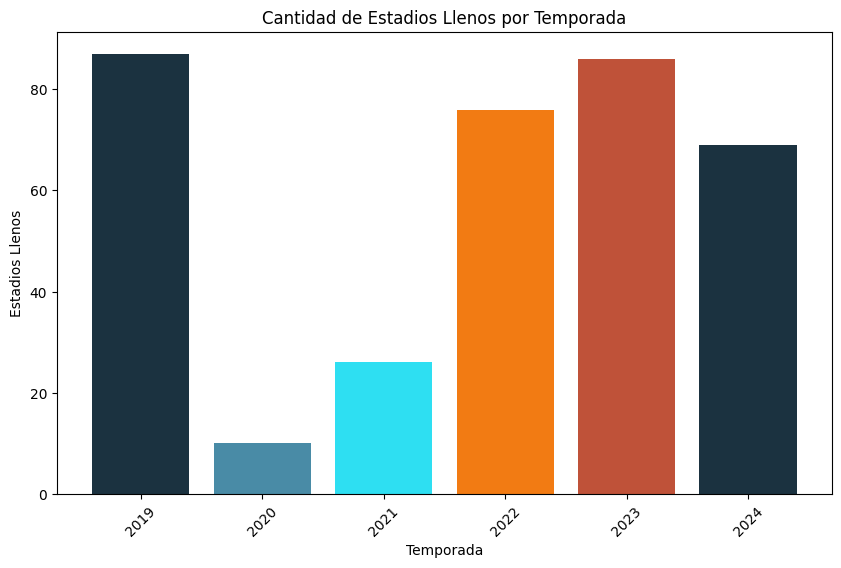

In [5]:
df['Estadios Llenos'] = pd.to_numeric(df['Estadios Llenos'], errors='coerce')

# Asegurar que 'Temporada' sea categórico o string
df['Temporada'] = df['Temporada'].astype(str)

# Agrupar los datos por 'Temporada' y sumar 'Estadios Llenos'
df_grouped = df.groupby('Temporada')['Estadios Llenos'].sum().reset_index()

# Crear la lista de colores personalizados
custom_colors = ['#1B3240', '#498BA6', '#2EDFF2', '#F27B13', '#BF5239']

# Crear el gráfico de barras con los colores personalizados
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Temporada'], df_grouped['Estadios Llenos'], color=custom_colors[:len(df_grouped)])
plt.xlabel('Temporada')
plt.ylabel('Estadios Llenos')
plt.title('Cantidad de Estadios Llenos por Temporada')
plt.xticks(rotation=45)
plt.show()



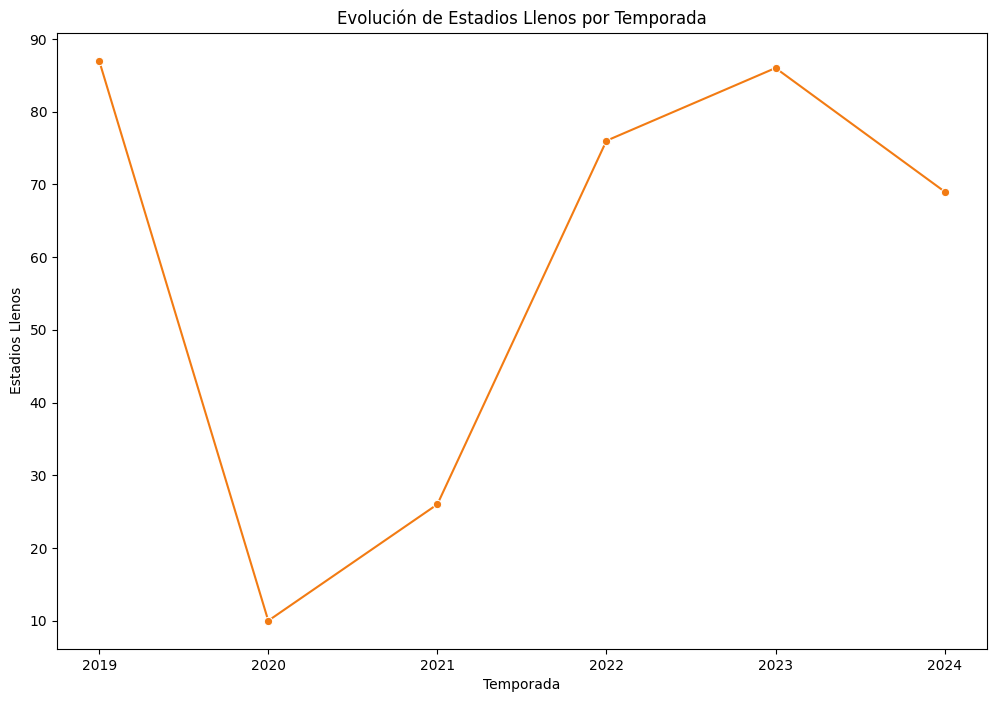

In [6]:
# Crear un gráfico de línea de tiempo con los colores personalizados
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_grouped, x='Temporada', y='Estadios Llenos', marker='o', color=custom_colors[3])
plt.xlabel('Temporada')
plt.ylabel('Estadios Llenos')
plt.title('Evolución de Estadios Llenos por Temporada')
plt.show()

Los gráficos muestran un notable incremento en la cantidad de estadios llenos por temporada, especialmente a partir del período post-pandemia de COVID-19. Observamos una tendencia creciente en la asistencia, con un regreso a los niveles de asistencia previos a la pandemia en 2023. Este repunte puede atribuirse, en parte, al impacto del fichaje de Lionel Messi, que generó un gran interés en la liga.

En 2024, incluso antes de que se inicie la etapa de playoffs, ya se han superado los 60 estadios llenos. Este dato es significativo ya que se ha alcanzado sin haber llegado aún a la mitad de la temporada, lo que sugiere un fuerte impulso en la asistencia que podría continuar a lo largo del año.

C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\1242142404.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Espectadores Totales', y='Equipo', palette=custom_colors)
C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\1242142404.py:18: UserWarning: 
The palette list has fewer values (5) than needed (33) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_grouped, x='Espectadores Totales', y='Equipo', palette=custom_colors)


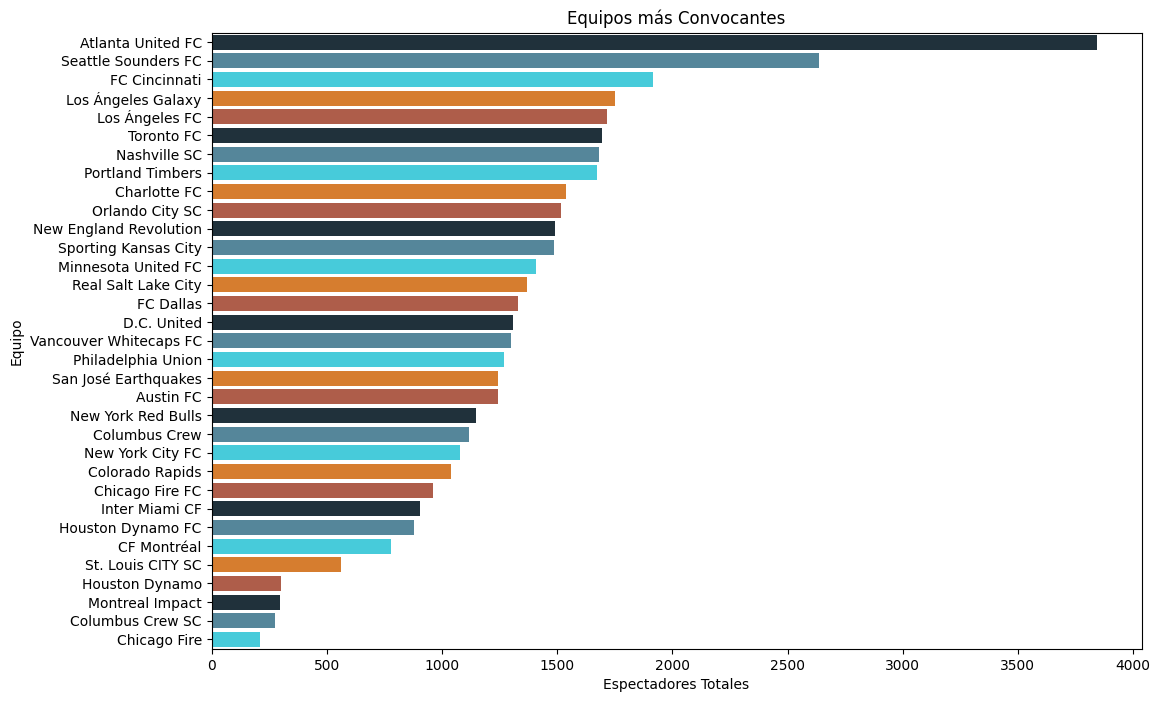

In [7]:
# Asegúrate de que 'Espectadores Totales' es numérico
df['Espectadores Totales'] = pd.to_numeric(df['Espectadores Totales'], errors='coerce')

# Asegúrate de que 'Equipo' es categórico o string
df['Equipo'] = df['Equipo'].astype(str)

# Agrupar los datos por 'Equipo' y sumar 'Espectadores Totales'
df_grouped = df.groupby('Equipo')['Espectadores Totales'].sum().reset_index()

# Ordenar los equipos por el número total de espectadores
df_grouped = df_grouped.sort_values(by='Espectadores Totales', ascending=False)

# Crear la lista de colores personalizados
custom_colors = ['#1B3240', '#498BA6', '#2EDFF2', '#F27B13', '#BF5239']

# Crear el gráfico con los colores personalizados
plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Espectadores Totales', y='Equipo', palette=custom_colors)
plt.xlabel('Espectadores Totales')
plt.ylabel('Equipo')
plt.title('Equipos más Convocantes')
plt.show()

En cuanto a los equipos más convocantes podemos ver que se destacan zonas como Georgia, Ohio y Washington. 
En cuanto al Atlanta podemos destacar que tiene uno de los estadios con mayor capacidad de toda la liga  

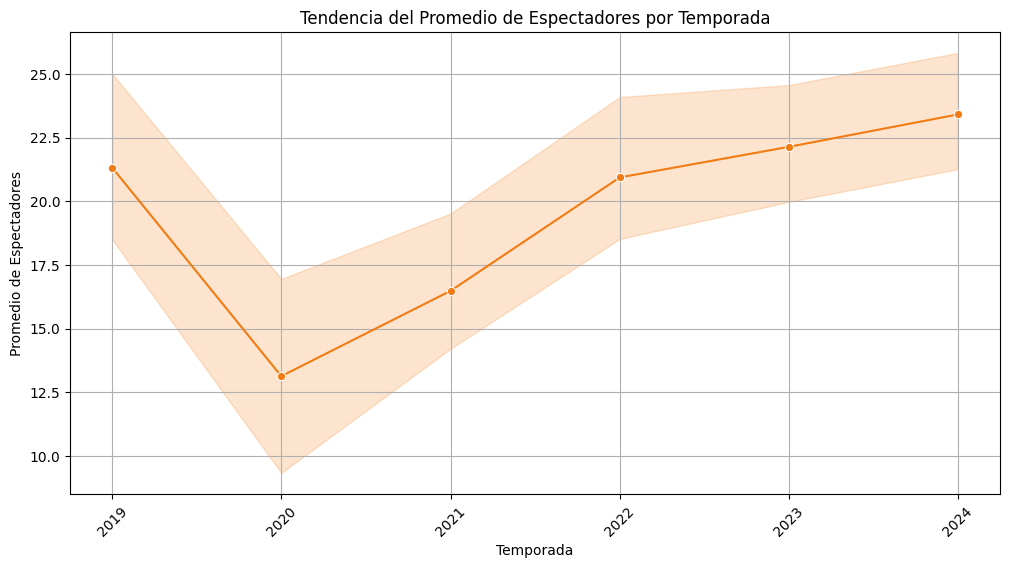

In [8]:


# Asegúrate de que los datos están correctamente convertidos y ordenados
df['Promedio de Espectadores'] = pd.to_numeric(df['Promedio de Espectadores'], errors='coerce')
df['Temporada'] = pd.to_datetime(df['Temporada'], errors='coerce', format='%Y')  # Ajusta el formato si es necesario
df = df.sort_values(by='Temporada')

# Definir los colores de la paleta personalizada
paleta_personalizada = ['#1B3240', '#498BA6', '#2EDFF2', '#F27B13', '#BF5239']
line_color = paleta_personalizada[0]  # Selecciona el primer color de la paleta

# Gráfico de líneas con paleta personalizada
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Temporada', y='Promedio de Espectadores', marker='o', color=custom_colors[3])
plt.xlabel('Temporada')
plt.ylabel('Promedio de Espectadores')
plt.title('Tendencia del Promedio de Espectadores por Temporada')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\978444469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Temporada', y='Promedio de Espectadores', palette=paleta_personalizada)
C:\Users\Giova\AppData\Local\Temp\ipykernel_24112\978444469.py:15: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x='Temporada', y='Promedio de Espectadores', palette=paleta_personalizada)


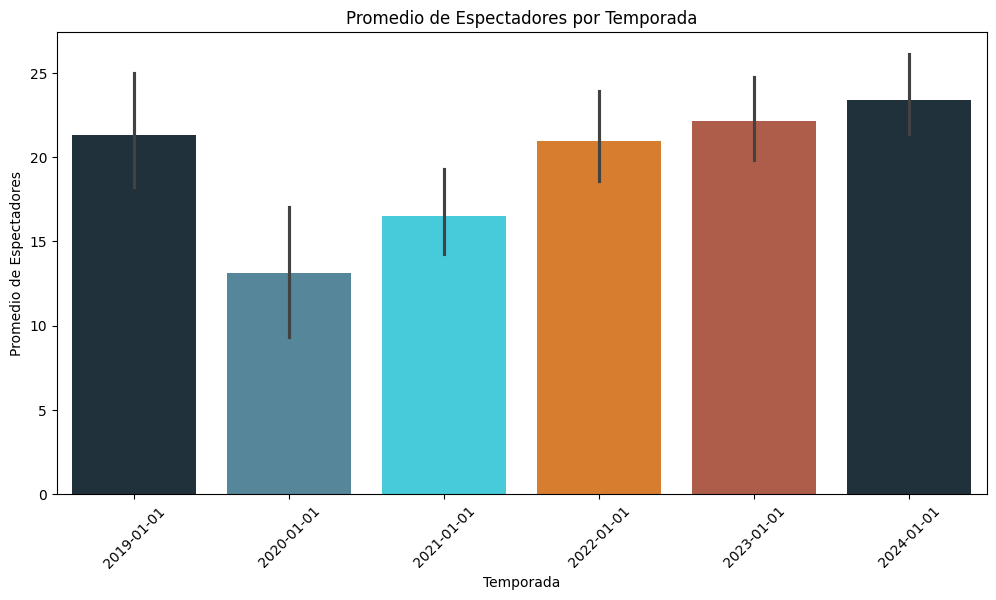

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que los datos están correctamente convertidos y ordenados
df['Promedio de Espectadores'] = pd.to_numeric(df['Promedio de Espectadores'], errors='coerce')
df['Temporada'] = pd.to_datetime(df['Temporada'], errors='coerce', format='%Y')  # Ajusta el formato si es necesario
df = df.sort_values(by='Temporada')

# Definir la paleta personalizada
paleta_personalizada = ['#1B3240', '#498BA6', '#2EDFF2', '#F27B13', '#BF5239']

# Gráfico de barras con paleta personalizada
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Temporada', y='Promedio de Espectadores', palette=paleta_personalizada)
plt.xlabel('Temporada')
plt.ylabel('Promedio de Espectadores')
plt.title('Promedio de Espectadores por Temporada')
plt.xticks(rotation=45)
plt.show()


Los gráficos muestran una clara tendencia ascendente en la cantidad promedio de espectadores en la MLS. Observamos que:

En la temporada 2023 se ve un aumento en la asistencia promedio, alcanzando cifras significativas que reflejan el crecimiento en la popularidad de la liga. Por otro lado, en la temporada 2024, habiendo transcurrido la mitad de la temporada, se ve otro aumento en sus números con casi 22 mil espectadores promedio, superando los registros anteriores y con un amplio margen de crecimiento.